<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [98]:
#ваш код здесь
hh_original = pd.read_csv(r'E:\Ан2\Аналитик (new)\Проджект питон\new_2025_03_02\for_balls\dst-3.0_16_1_hh_database.csv',sep=';')
hh_df = hh_original.copy()

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [99]:
#ваш код здесь
display(hh_df.head())
display(hh_df.shape) 

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


(44744, 12)

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [100]:
display(hh_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

4. Обратите внимание на информацию о числе непустых значений.

In [101]:
#ваш код здесь
list_info = []
for column in hh_df.columns:
    list_info.append((column, hh_df[column].isnull().sum(), hh_df[column].dtype))
    
pd.DataFrame(
    data = list_info,
    columns = ['Наименование столбца', 'Количество пустых строк', 'Тип данных']         
    )


,Наименование столбца,Количество пустых строк,Тип данных
0,"Пол, возраст",0,object
1,ЗП,0,object
2,Ищет работу на должность:,0,object
3,"Город, переезд, командировки",0,object
4,Занятость,0,object
5,График,0,object
6,Опыт работы,168,object
7,Последнее/нынешнее место работы,1,object
8,Последняя/нынешняя должность,2,object
9,Образование и ВУЗ,0,object


5. Выведите основную статистическую информацию о столбцах.


In [102]:
#ваш код здесь
hh_df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [103]:
#ваш код здесь
def get_education(education):
    education = ' '.join(education.split(' ')[:3])
    
    if 'Высшее' in education:
        return 'высшее'
    
    elif 'Неоконченное высшее' in education:
        return 'неоконченное высшее'
    
    elif 'Среднее специальное' in education:
        return 'среднее специальное'
    
    elif 'Среднее образование' in education:
        return 'среднее'
    
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(get_education)
hh_df.drop(columns='Образование и ВУЗ', inplace = True)
hh_df['Образование'].value_counts()

Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [104]:
#ваш код здесь
def get_gender(arg):
    gender = arg.split(', ')
    
    if 'Муж' in gender[0]:
        return 'М'
    
    elif 'Жен' in gender[0]:
        return 'Ж'
    
    
def get_age(age):
    gender = age.split(', ')
    return gender[1].split(' ')[1]
  
    
hh_df['Пол'] = hh_df['Пол, возраст'].apply(get_gender) 
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(get_age) 
hh_df['Возраст'] = hh_df['Возраст'].astype('int16')
hh_df.drop(columns='Пол, возраст', inplace = True)
print(round(hh_df['Пол'].value_counts(normalize=True)['Ж'] * 100, 2))
print(round(hh_df['Возраст'].mean(), 2))
hh_df.info()

19.07
32.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ЗП                               44744 non-null  object
 1   Ищет работу на должность:        44744 non-null  object
 2   Город, переезд, командировки     44744 non-null  object
 3   Занятость                        44744 non-null  object
 4   График                           44744 non-null  object
 5   Опыт работы                      44576 non-null  object
 6   Последнее/нынешнее место работы  44743 non-null  object
 7   Последняя/нынешняя должность     44742 non-null  object
 8   Обновление резюме                44744 non-null  object
 9   Авто                             44744 non-null  object
 10  Образование                      44744 non-null  object
 11  Пол                              44744 non-null  object
 12  Возраст              

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [105]:
#ваш код здесь
def experience(arg):
    if 'Не указано' != arg and arg is not np.nan:
        arg = str(arg).split(' ')[:7]
    
        year = 0
        month= 0
        if 'года' in arg:
            year = arg[arg.index('года')-1]
        
        elif 'год' in arg: 
            year = arg[arg.index('год') -1]
        
        elif 'лет' in arg:
            year = arg[arg.index('лет') -1]
        
        if 'месяц' in arg:
            month = arg[arg.index('месяц')-1]
        
        elif 'месяца' in arg: 
            month = arg[arg.index('месяца') -1]
        
        elif 'месяцев' in arg:
            month = arg[arg.index('месяцев') -1]
       
        return int(int(float(year))*12 + int(float(month)))
    
    else:
        return np.nan

hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(experience)
hh_df.drop(columns='Опыт работы', inplace=True)
hh_df['Опыт работы (месяц)'].median()
         

np.float64(100.0)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [106]:
#ваш код здесь
million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 
                  'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
main_city = ['Москва', 'Санкт-Петербург']
#"Город", "Готовность к переезду", "Готовность к командировкам"

def city(arg):
    arg = arg.split(' , ')
    
    if 'Москва' in arg[0]:
        return 'Москва'
    
    elif 'Санкт-Петербург' in arg[0]:
        return 'Санкт-Петербург'
    
    for city in million_cities:
    
        if city in arg[0]:
            return "город-миллионник"
    
        else:
            return "другие"
    
    
def trip(arg):
        arg = arg.split(' , ')[-1]
            
        if "не готов" in arg and "к" in arg and "перее" not in arg:
            return False
        
        # есть битые данные, например - готов к команд, готов к, готов к командир
    
        elif "готов" in arg and "к" in arg and "перее" not in arg:
            return True
            
        else:
            return False
            

def removal(arg):
    
    arg = arg.split(' , ')[-2]         
    arg2 = arg.split(' , ')[-1] # если нет командировки, значит переезд последний         
    if "не готов" in arg and "переезд" in arg:
        return False
            
    elif "не готов" in arg2 and "переезд" in arg2:
        return False
            
    else:
        return True
               
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(city)
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(trip)
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(removal)
display(hh_df['Город'].value_counts(normalize=True))
display(hh_df['Готовность к командировкам'].value_counts())
display(hh_df['Готовность к переезду'].value_counts())
hh_df.drop(columns='Город, переезд, командировки', inplace = True)
hh_df[(hh_df['Готовность к командировкам'] == True) & (hh_df['Готовность к переезду'] == True)]['Готовность к командировкам'].count() /  44744 * 100    

Город
другие              0.496759
Москва              0.371469
Санкт-Петербург     0.110339
город-миллионник    0.021433
Name: proportion, dtype: float64

Готовность к командировкам
True     31645
False    13099
Name: count, dtype: int64

Готовность к переезду
False    28719
True     16025
Name: count, dtype: int64

np.float64(31.876899696048632)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [107]:
#ваш код здесь
cols = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
cols2 = ['полный день', 'сменный график', 'гибкий график', 'удалённая работа', 'вахтовый метод']
hh_df['Занятость'] = hh_df['Занятость'].apply(lambda x: x.split(', ')) 
hh_df['График'] = hh_df['График'].apply(lambda x: x.split(', ')) 

for col in cols:
    hh_df[col] = hh_df['Занятость'].apply(lambda x: True if col in x else False)
    
for col in cols2:
    hh_df[col] = hh_df['График'].apply(lambda x: True if col in x else False)
 
hh_df.drop(columns = ['Занятость','График'], inplace=True)   
hh_df[(hh_df['волонтерство'] == True) & (hh_df['проектная работа'] == True)].shape
hh_df[(hh_df['вахтовый метод'] == True) & (hh_df['гибкий график'] == True)].shape

(2311, 23)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [108]:
#ваш код здесь

# промежуточные обновления
rates_df = pd.read_csv(r'E:\Ан2\Аналитик (new)\Проджект питон\new_2025_03_02\Project_python2\ExchangeRates.csv', 
                       usecols=['date', 'currency', 'close', 'proportion'])

hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме'],dayfirst=True).dt.date
rates_df['date'] = pd.to_datetime(rates_df['date'], dayfirst=True, format = "%d/%m/%y").dt.date

# приведём валюту к нормальному виду
hh_df['Валюта'] = hh_df['ЗП'].apply(lambda x: x.split(' ')[-1].replace('.',''))
hh_df['ЗП'] = hh_df['ЗП'].apply(lambda x: x.split(' ')[0].replace('.',''))
hh_df['ЗП'] = hh_df['ЗП'].astype('float64')
currency = list[set(hh_df['Валюта'])]
currency_find = rates_df['currency'].unique()

def currency_replace(arg):
    
    if arg == 'сум':
        return 'UZS'
    
    elif arg == 'белруб':
        return 'BYN'
    
    elif arg == 'грн':
        return 'UAH'
    
    else:
        return arg

hh_df['Валюта'] = hh_df['Валюта'].apply(currency_replace)

# проверил на дубли
rates_df.duplicated(subset=['date', 'currency']).sum()

# соединяем таблицы
old_shape = hh_df.shape[0]
hh_merge = hh_df.merge(
    right = rates_df,
    how = 'left',
    left_on = ['Обновление резюме', 'Валюта'],
    right_on = ['date', 'currency']
)
hh_merge.shape[0] == old_shape # проверка на исходное количество строк 
hh_merge.loc[hh_merge['Валюта']=='руб', 'close'] = 1
hh_merge.loc[hh_merge['Валюта']=='руб', 'proportion'] = 1

hh_merge['ЗП (руб)'] = hh_merge['ЗП']*(hh_merge['close']/hh_merge['proportion'])
hh_merge['close'].isnull().sum()
hh_merge.drop(columns=['date', 'currency', 'close', 'proportion','Валюта', 'ЗП'], inplace=True)
hh_merge['ЗП (руб)'].median()

np.float64(59019.0)

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

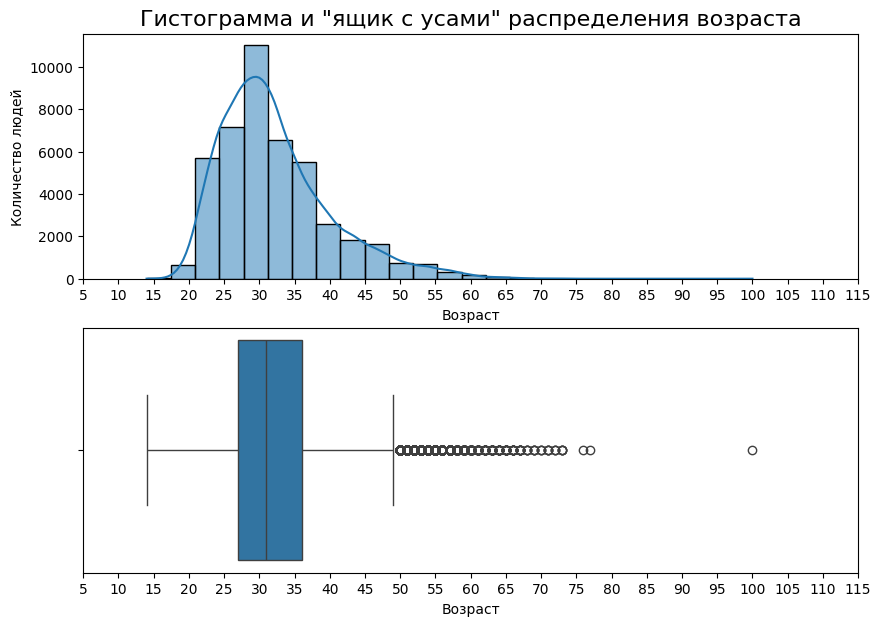

In [109]:
# ваш код здесь
fig, axes = plt.subplots(2,1,figsize=(10,7))
sns.histplot(
    data=hh_merge,
    x='Возраст',
    bins=25,
    kde=True,
    ax=axes[0]
);
boxplot = sns.boxplot(
    data=hh_merge,
    x='Возраст',
    orient='h',
    width=0.9,
    ax=axes[1]
);
axes[0].set_title('Гистограмма и "ящик с усами" распределения возраста', fontsize=16);
axes[0].set_ylabel('Количество людей');
axes[0].set_xticks(range(5,120,5));
#axes[0].set_yticks(range(0,12000,500));
#axes[0].grid();
#axes[1].grid();
axes[1].set_xticks(range(5,120,5));

Распределение признака похоже на нормальное с ассиметрией вправо. Большинство людей ищут работу от 25 до 40 лет. Мода равна 30 годам, минмум 14 лет, максимум 100 лет, что очень странно. Если посмотреть на этого человека, то опыт работы у него 30 месяцев, скорее всего данные неверные и будет выбросом.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

np.int64(170)

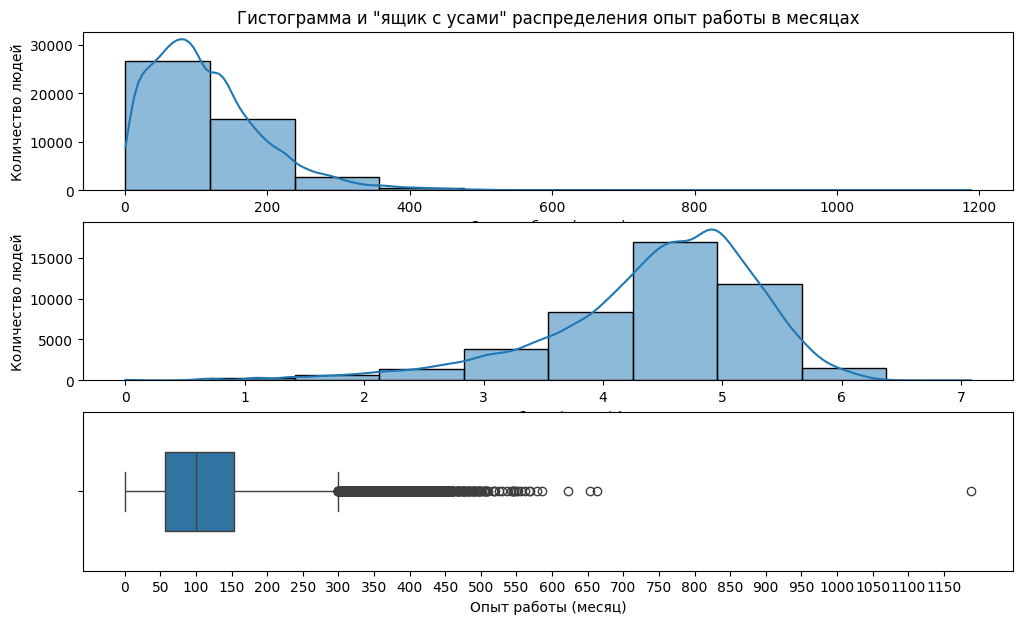

In [110]:
# ваш код здесь
hh_merge['Опыт работы (месяц) log'] = np.log(hh_merge['Опыт работы (месяц)'])

fig, axes = plt.subplots(3,1,figsize=(12,7))
sns.histplot(
    data=hh_merge,
    x='Опыт работы (месяц)',
    bins=10,
    kde=True,
    ax=axes[0]
);
sns.histplot(
    data=hh_merge,
    x='Опыт работы (месяц) log',
    bins=10,
    kde=True,
    ax=axes[1]
);
boxplot = sns.boxplot(
    data=hh_merge,
    x='Опыт работы (месяц)',
    orient='h',
    width=0.5,
    ax=axes[2]
);
axes[0].set_title('Гистограмма и "ящик с усами" распределения опыт работы в месяцах', fontsize=12);
axes[0].set_ylabel('Количество людей');
axes[1].set_ylabel('Количество людей');
axes[2].set_xticks(range(0,1200,50));

hh_merge['Опыт работы (месяц)'].median()
hh_merge['Опыт работы (месяц)'].max()
hh_merge[hh_merge['Опыт работы (месяц)']>500]['Возраст'].unique()
hh_merge['Опыт работы (месяц)'].isnull().sum()

* 1 Чему равна мода распределения? = 100
* 2 Каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? =
предельные значения достигаются на отметке 1188, диапазон для большинства соискателей от 60 до 150 месяцев
* 3 Есть ли аномалии для признака? Если есть, то какие значения вы бы причислили к таковым? =
Распределение похоже на логнормальное, поэтому я сделал ещё один график с логарифмированием признака. Сомнения вызывает опыт работы более 500 месяцев, \
то есть  более 40 лет. Если подумать логически, то более 40 лет, это значения от 500 месяцев, оценивая возраст соискателей при таком опыте работе, \
можно встретить 48 летних людей, что очень странно. (Это и будет аномалией) 

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


(84, 25)

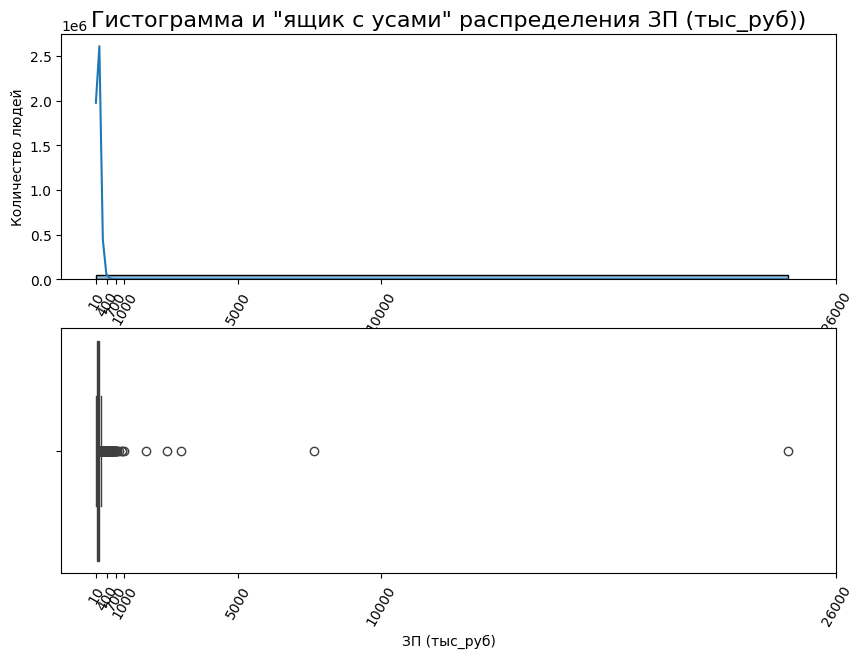

In [111]:
# ваш код здесь
hh_merge['ЗП (тыс_руб)'] = hh_merge['ЗП (руб)']/1000

fig, axes = plt.subplots(2,1,figsize=(10,7))
sns.histplot(
    data=hh_merge,
    x='ЗП (тыс_руб)',
    bins=1,
    kde=True,
    ax=axes[0]
);
boxplot = sns.boxplot(
    data=hh_merge,
    x='ЗП (тыс_руб)',
    orient='h',
    width=0.9,
    ax=axes[1]
);
axes[0].set_title('Гистограмма и "ящик с усами" распределения ЗП (тыс_руб))', fontsize=16);
axes[0].set_ylabel('Количество людей');
axes[1].set_xticks([10,400,700,1000,5000,10000,26000]);
axes[0].set_xticks([10,400,700,1000,5000,10000,26000]);
axes[1].xaxis.set_tick_params(rotation=60)
axes[0].xaxis.set_tick_params(rotation=60);

# данные вне графика
(hh_merge['ЗП (руб)'] > 500_000).sum()
hh_merge[hh_merge['ЗП (руб)'] > 5_000_000]
hh_merge['ЗП (руб)'].mode()
hh_merge['ЗП (руб)'].max()
hh_merge[hh_merge['ЗП (руб)'] < 6_000].shape
hh_merge['ЗП (руб)'].min()
hh_merge[hh_merge['ЗП (руб)'] < 1_000].shape


* Чему равна мода распределения? = 50_000 рублей
* Каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? = \
Предельные значения от 1 до 24_304_876. Большинство соискателей в диапазоне от 10_000 до 400_000 рублей  
* Есть ли аномалии для признака заработной платы? Если есть, то какие значения вы бы причислили к таковым? =  \
Есть аномалии, кто согласится работать за 1  или за 1000 рублей? Также я бы проверил данные, где зарплаты более миллиона рублей (Какой опыт, возраст,  должность).

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

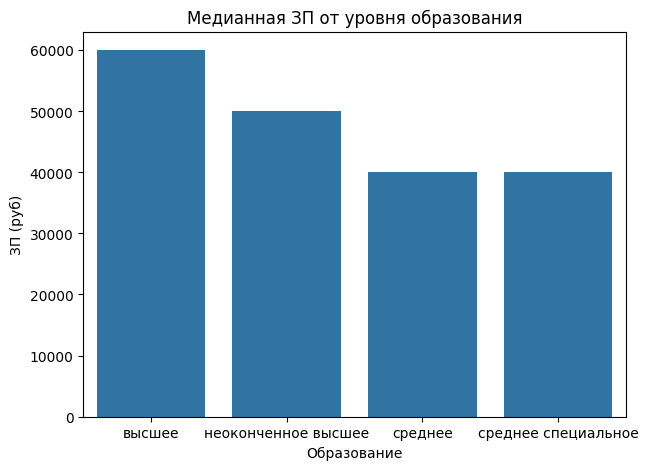

In [112]:
# ваш код здесь
hh = hh_merge[hh_merge['ЗП (руб)'] < 1000000]
hh_sns = hh.pivot_table(
    index = 'Образование',
    aggfunc='median',
    values ='ЗП (руб)'
)

fig = plt.figure(figsize=(7, 5))

barplot = sns.barplot(
    data = hh_sns,
    x = 'Образование',
    y = 'ЗП (руб)',
)
barplot.set_title('Медианная ЗП от уровня образования');

* Для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы?
Среднее специальное образование имеет меньший уровень желаемой зп. Высшее - наибольший уровень зп.
* Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?
Я думаю важен. Также я бы исследовал зависимость признака - "желаемый уровень зп" от количества образований, а также от престижности ВУЗа.


5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

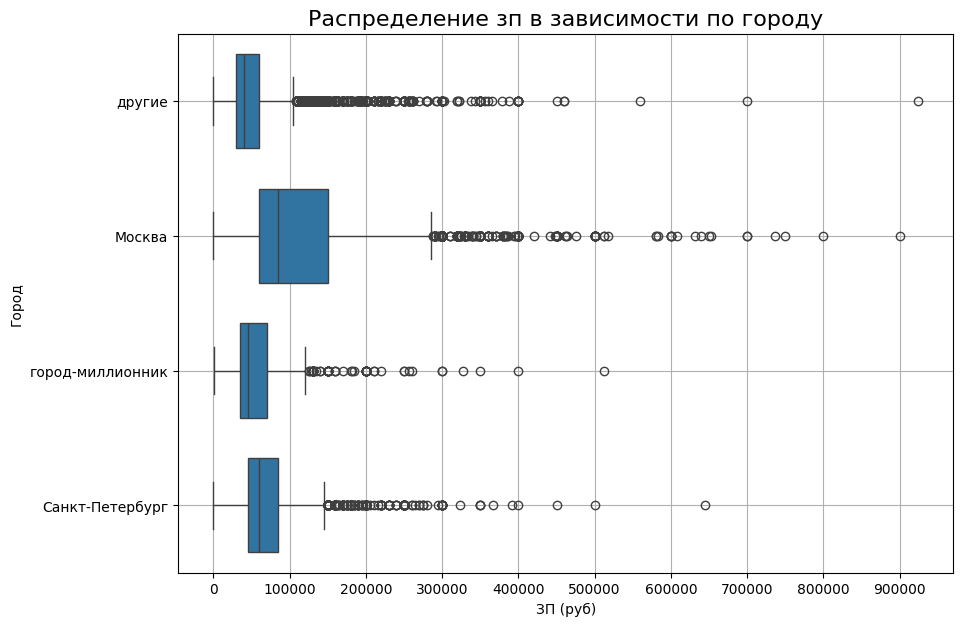

In [113]:
# ваш код здесь
fig = plt.figure(figsize=(10, 7))

boxplot = sns.boxplot(
    data=hh,
    x='ЗП (руб)',
    y ='Город',
    orient='h',
    width=0.7 
)

boxplot.set_title('Распределение зп в зависимости по городу', fontsize = 16);
boxplot.set_xticks(range(0,1000000,100000));
boxplot.grid();

* Как соотносятся медианные уровни желаемой заработной платы и их размах в городах? \
Чем крупнее город, тем больше размах и медианный уровень желаемой зарплаты
* Как вы считаете, важен ли признак города при прогнозировании заработной платы? \
Важен не город, а количество населения в нём

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [114]:
# ваш код здесь
from IPython.display import HTML
bar_data = hh_merge.groupby(['Готовность к командировкам', 'Готовность к переезду'], as_index=False)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная заработная плата по готовности к командировками или переезду'
)

# Сохраняем в HTML
fig.write_html("plot.html")

# Вставка рисунка напрямую
fig.show()

# Вставка рисунка из файла (интерактив сохраняется)
#HTML(filename="plot.html")

<img width='100%' src='newplot.png'>

Медианная зп готовности к пеерезду и командировкам преобладает над прочими категориями.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

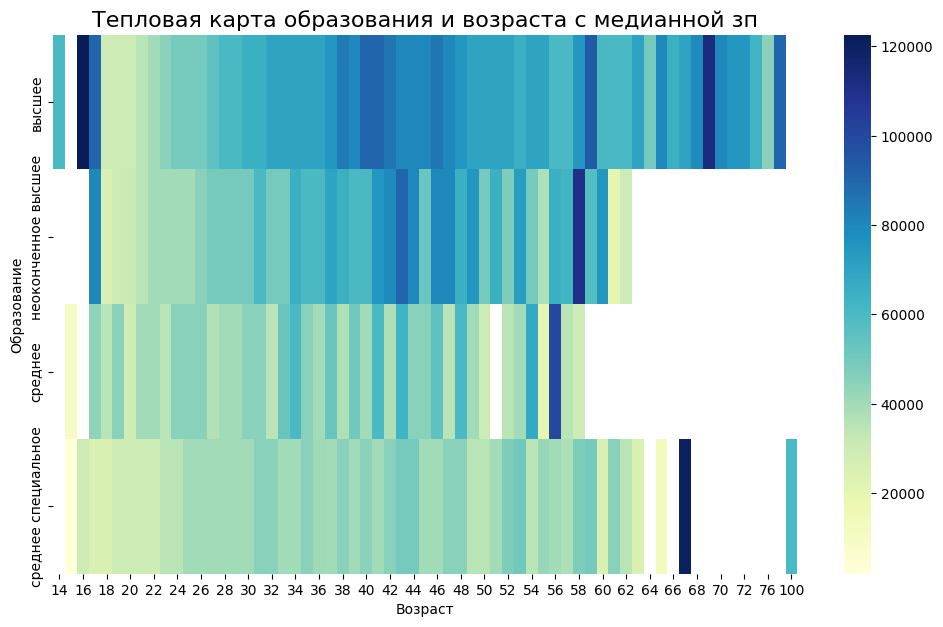

In [115]:
# ваш код здесь
heat_bar = hh_merge.pivot_table(
    values = 'ЗП (руб)',
    aggfunc= 'median',
    columns = 'Возраст',
    index = 'Образование'
)

fig, ax = plt.subplots(figsize=(12, 7))
heatmap = sns.heatmap(data=heat_bar, cmap='YlGnBu')
heatmap.set_title('Тепловая карта образования и возраста с медианной зп', fontsize=16);

Наибольший рост медианной зп наблюдается у двух категорий образования - высшее и неоконченное высшее. Но что это за высшее образование в 14 лет?

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

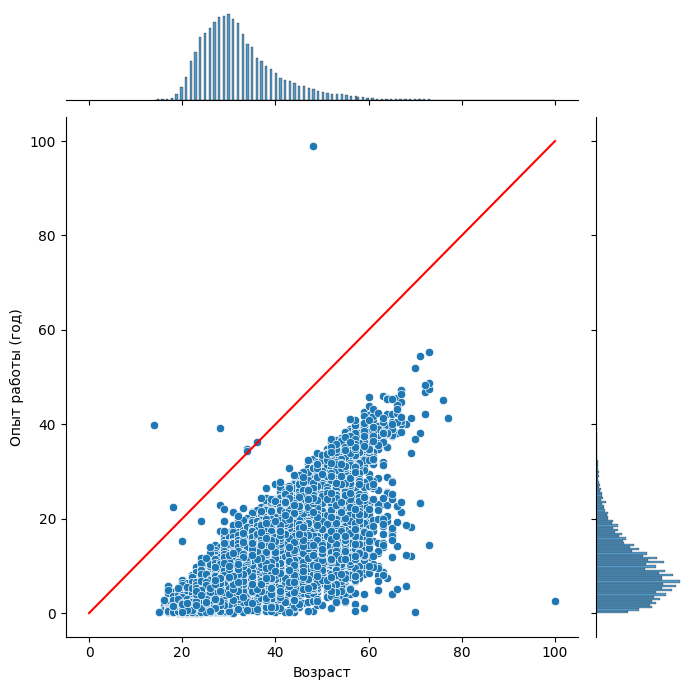

In [116]:
# ваш код здесь
hh_merge['Опыт работы (год)'] = hh_merge['Опыт работы (месяц)']/12

jointplot = sns.jointplot(
    data=hh_merge, 
    x='Возраст', 
    y='Опыт работы (год)',
    height=7 
);
sns.lineplot(x=[0, 100], y=[0, 100], color='red');

Есть аномалии, где опыт больше возраста или равен ему. Также стоит обратить внимание на 100-него кандидата.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


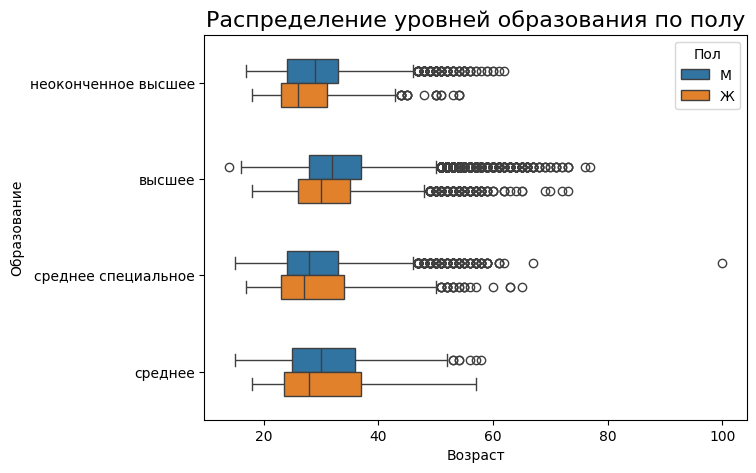

In [117]:
# ваш код здесь
fig, axes = plt.subplots(1,1,figsize=(7,5))

boxplot = sns.boxplot(
    data=hh_merge,
    x='Возраст',
    y='Образование',
    orient='h',
    hue = 'Пол',
    width=0.5
);
boxplot.set_title('Распределение уровней образования по полу', fontsize=16);

Медиана в каждой мужской группе выше, чем в соответствующей категории образования у женщин. Возможно поэтому в графике ниже у мужчин зарплатные ожидания выше?

Пол
Ж    48000.0
М    60000.0
Name: ЗП (руб), dtype: float64

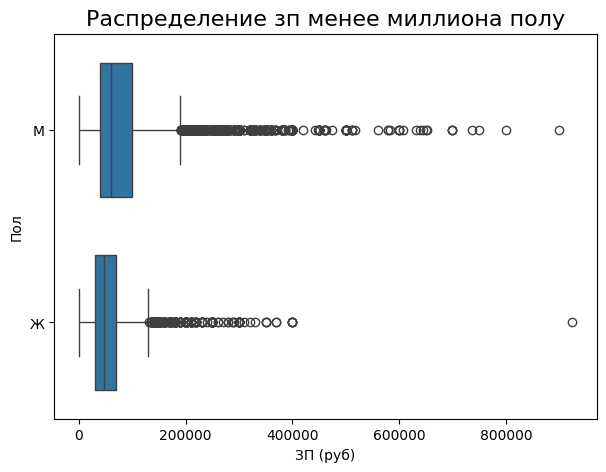

In [118]:
# ваш код здесь
fig, axes = plt.subplots(1,1,figsize=(7,5))

# меньше миллиона 
boxplot = sns.boxplot(
    data=hh,
    y='Пол',
    x='ЗП (руб)',
    orient='h',
    width=0.7
);
boxplot.set_title('Распределение зп менее миллиона полу', fontsize=16);
hh.groupby('Пол')['ЗП (руб)'].median()

У мужчин зарплатные ожидания выше, чем у женщин, но почему?

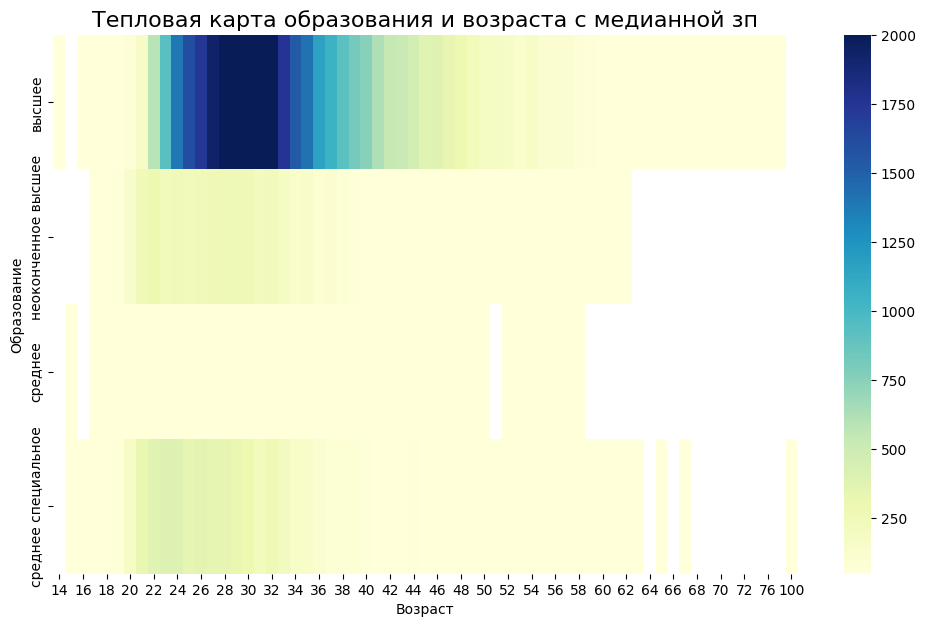

In [119]:
# ваш код здесь
hh_merge['Возраст']
hh_merge['Образование']
hh_merge.groupby(['Образование','Возраст'], as_index=True)['Пол'].count()

# ваш код здесь
heat_bar = hh_merge.pivot_table(
    values = 'Пол',
    aggfunc= 'count',
    columns = 'Возраст',
    index = 'Образование'
   
)
heat_bar
fig, ax = plt.subplots(figsize=(12, 7))
heatmap = sns.heatmap(data=heat_bar, cmap='YlGnBu', vmin=50, vmax=2000)
heatmap.set_title('Тепловая карта образования и возраста с медианной зп', fontsize=16);

Большинство людей от 22 до 46 лет имеют высшее образование

In [120]:
hh_df.groupby('Пол')['Возраст'].count() 

Пол
Ж     8533
М    36211
Name: Возраст, dtype: int64

Соискателей среди мужчин в 4,5 раза больше, чем у женщин. Возможно поэтому медианная зп мужчин выше женщин, а также за счёт более высокого уровня образования.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [121]:
# ваш код здесь
hh_merge = hh_merge.drop_duplicates(subset=hh_merge.columns)
abs(hh_merge.shape[0] - 44744)

161

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [122]:
# ваш код здесь
data_null = hh_merge.isnull().sum()
data_null[data_null > 0]

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
Опыт работы (месяц) log            168
Опыт работы (год)                  168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [123]:
# ваш код здесь
hh_merge.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'], inplace=True, axis=0)
# hh_merge.shape
hh_merge.fillna({'Опыт работы (месяц)' : hh_merge['Опыт работы (месяц)'].median()}, inplace=True)
hh_merge['Опыт работы (месяц)'].mean()

np.float64(114.35777573405711)

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [124]:
hh_merge.shape[0]

44581

In [125]:
# ваш код здесь
old=hh_merge.shape[0]
mask = (hh_merge['ЗП (руб)'] <= 1_000_000) & (hh_merge['ЗП (руб)'] >= 1_000)
hh_merge = hh_merge[mask]
old - hh_merge.shape[0]


89

In [126]:
hh_merge.shape

(44492, 26)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [127]:
# ваш код здесь
hh_merge = hh_merge[hh_merge['Возраст'] > hh_merge['Опыт работы (год)']]
hh_merge.shape


(44319, 26)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44316


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,ЗП (руб),Опыт работы (месяц) log,ЗП (тыс_руб),Опыт работы (год)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,среднее,М,15,2.0,Санкт-Петербург,...,False,False,True,True,False,False,10000.0,0.693147,10.0,0.166667
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,среднее специальное,М,15,3.0,другие,...,False,True,False,False,False,False,2000.0,1.098612,2.0,0.250000
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,False,True,False,False,60000.0,3.401197,60.0,2.500000


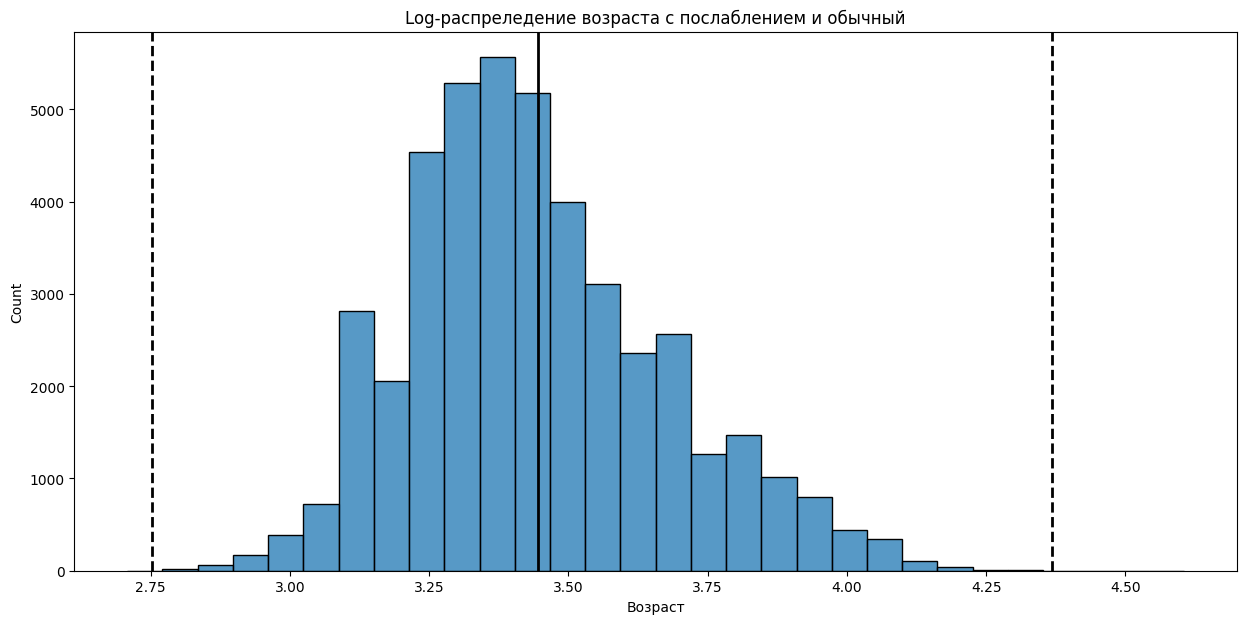

In [128]:
# ваш код здесь
def outliers_z_score_mod(data, feature, log_scale=False,left=3,right=3):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


outliers, cleaned = outliers_z_score_mod(hh_merge, 'Возраст', log_scale=True,left=3 ,right=4)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
log_hh = np.log(hh_merge['Возраст'])

sns.histplot(log_hh, bins=30, ax=ax)
ax.axvline(log_hh.mean(), color='k', lw=2)
ax.axvline(log_hh.mean() + 4 * log_hh.std(), color='k', ls='--', lw=2)
ax.axvline(log_hh.mean() - 3 * log_hh.std(), color='k', ls='--', lw=2)
ax.set_title('Log-распреледение возраста с послаблением и обычный');

display(outliers)


В решении автора ошибка, не надо добавлять +1 \
Выбросами являются 15 лет и 100 лет. При послаблении в право на 1 сигму выбросов всего три (На графике это едва заметно).
